### **Dataset Simulasi Uji LSP Data Science UDINUS 2024 (Winconsin Breast Cancer)**: [https://bit.ly/dataset-simulasi-lsp-udinus-2024](https://bit.ly/dataset-simulasi-lsp-udinus-2024)

### <b>Daftar Isi</b>
* [1) Mengumpulkan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Memvalidasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Mengkonstruksi Data](#h6)
* [7) Menentukan Label Data](#h7)
* [8) Membangung Model](#h8)
* [9) Mengevaluasi Hasil Pemodelan](#h9)
* [10) Optimasi Model Klasifikasi](#h10)

## <b>1) Mengumpulkan Data</b> <a class="anchor" id="h1"></a>

In [31]:
# Load library yang diperlukan
import pandas as pd
import numpy as np

In [32]:
# Load data menjadi data frame
dataset = pd.read_csv('/content/breast-cancer-wisconsin.data', header=None)

dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


*Lihat <b style="color:yellow;">informasi atribut</b> pada file "<span style="color:orange;">breast-cancer-wisconsin.names</span>", poin ke-<b style="color:tomato;">7</b>.

In [33]:
# Memasukkan nama fitur kedalam dataset
dataset.columns = [
  "Sample_code_number",
  "Clump_thickness",
  "Uniformity_of_cell_size",
  "Uniformity_of_cell_shape",
  "Marginal_adhesion",
  "Single_epithelial_cell_size",
  "Bare_nuclei",
  "Bland_chromatin",
  "Normal_nucleoli",
  "Mitoses",
  "Class"
]

In [34]:
# Lakukan pengecekan apakah dataset sudah benar dengan menampilkan 5 data teratas
dataset.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## <b>2) Menelaah Data</b> <a class="anchor" id="h2"></a>

In [35]:
# Menampilkan informasi dari file dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [36]:
# Menampilkan deskripsi dari file dataset
dataset.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# tuliskan kode program untuk Menampilkan distribusi kelas dari semua fitur
# dibawah adalah contoh kode program untuk fitur 1

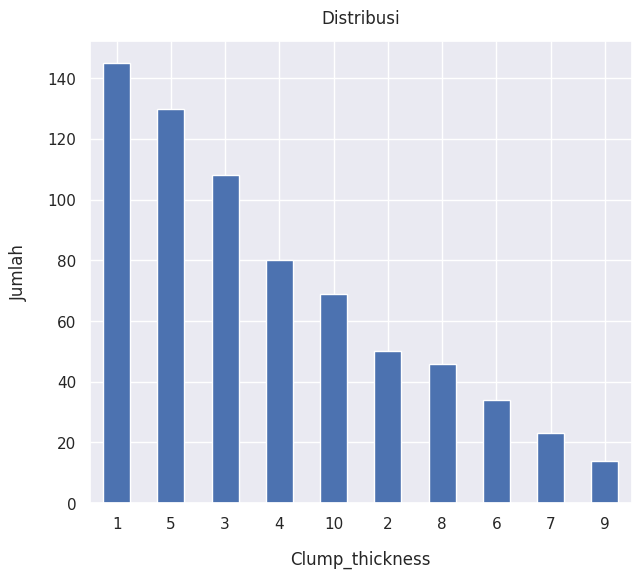

In [39]:
sns.set_theme(font_scale=1.0)
dataset['Clump_thickness'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Clump_thickness", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

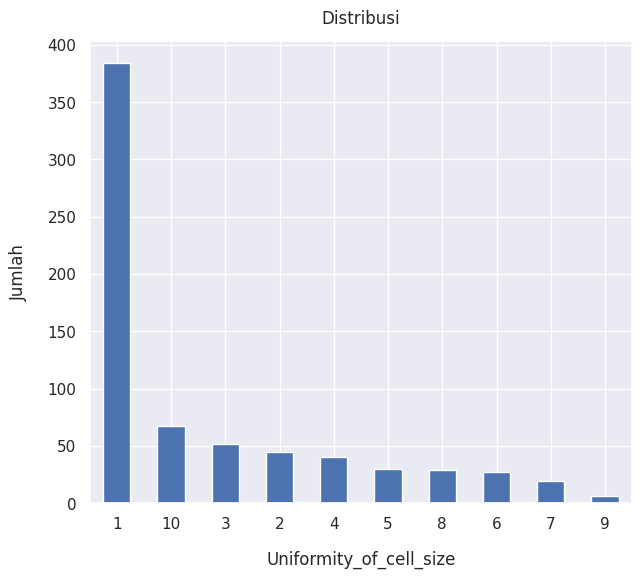

In [40]:
sns.set_theme(font_scale=1.0)
dataset['Uniformity_of_cell_size'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Uniformity_of_cell_size", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

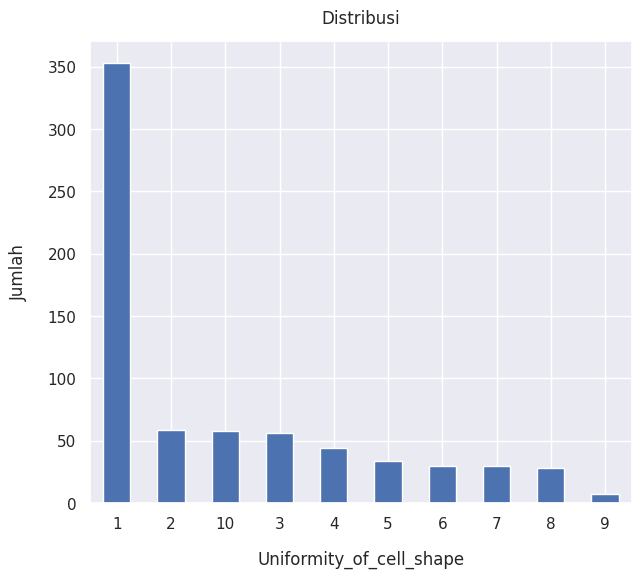

In [41]:
sns.set_theme(font_scale=1.0)
dataset['Uniformity_of_cell_shape'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Uniformity_of_cell_shape", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

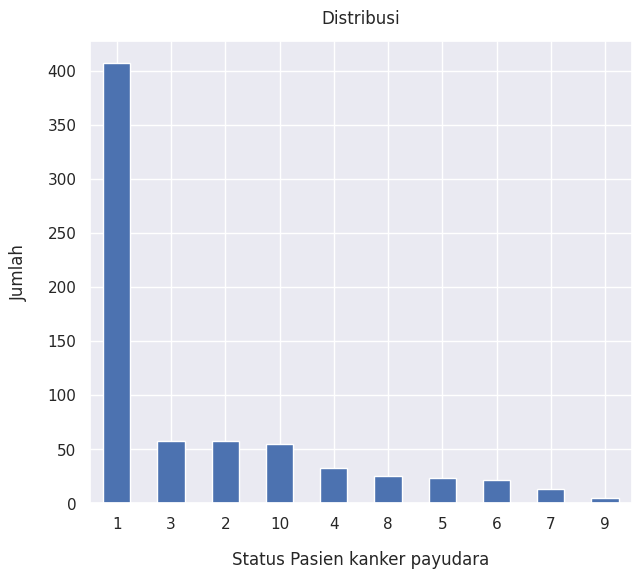

In [42]:
sns.set_theme(font_scale=1.0)
dataset['Marginal_adhesion'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

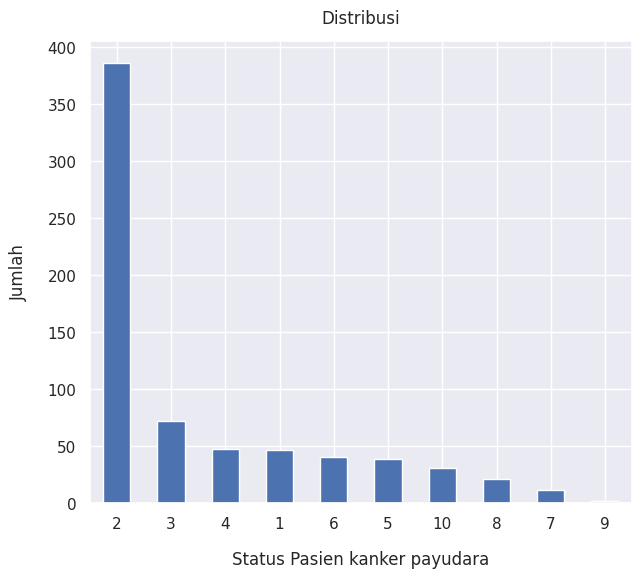

In [43]:
sns.set_theme(font_scale=1.0)
dataset['Single_epithelial_cell_size'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

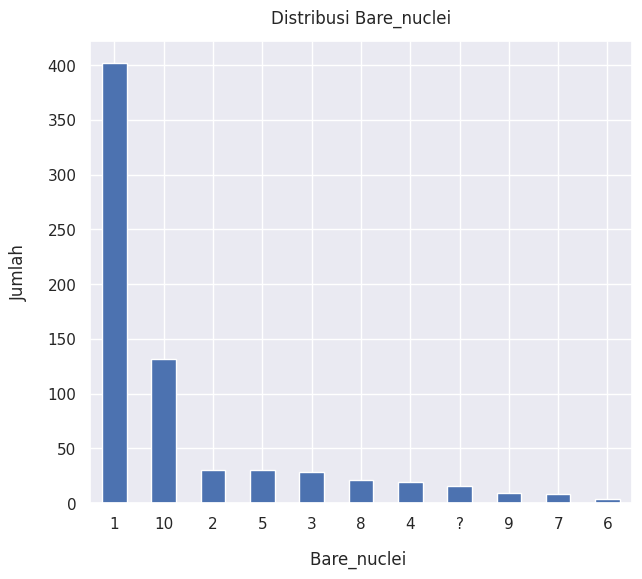

In [44]:
sns.set_theme(font_scale=1.0)
dataset['Bare_nuclei'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bare_nuclei ", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Bare_nuclei", y=1.02);

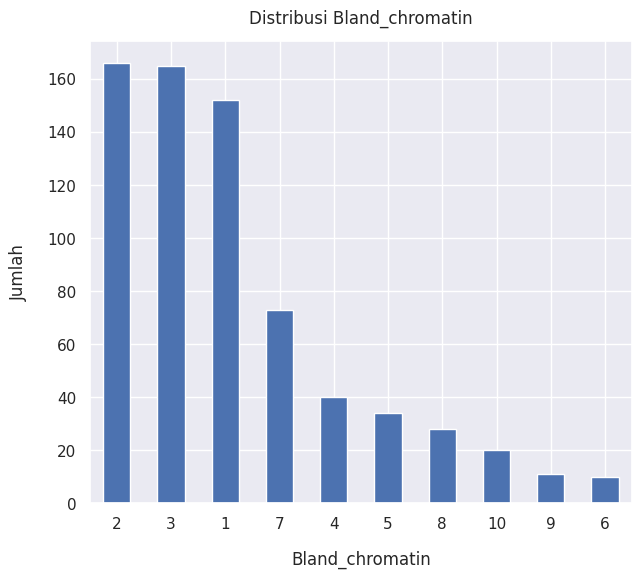

In [45]:
sns.set_theme(font_scale=1.0)
dataset['Bland_chromatin'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bland_chromatin", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Bland_chromatin", y=1.02);

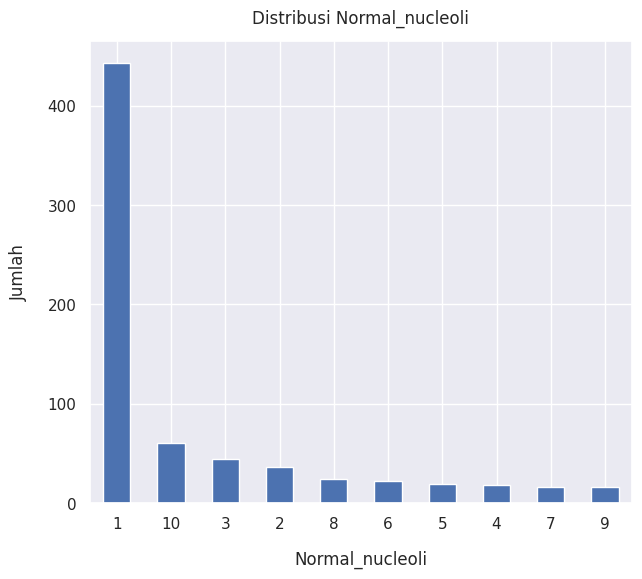

In [46]:
sns.set_theme(font_scale=1.0)
dataset['Normal_nucleoli'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Normal_nucleoli", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Normal_nucleoli", y=1.02);

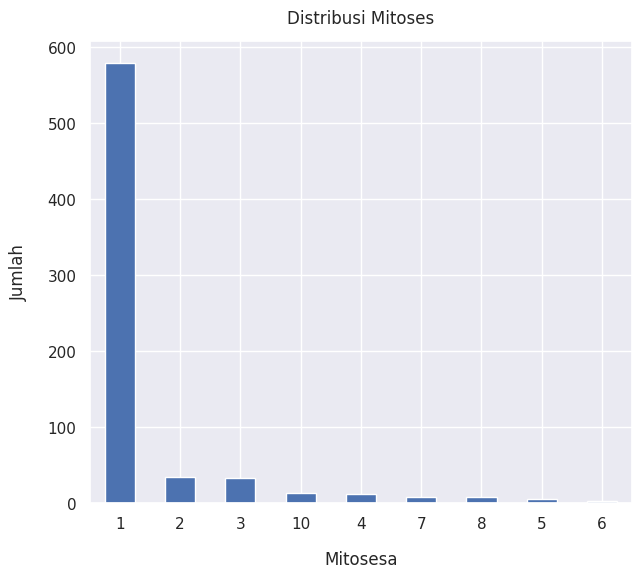

In [47]:
sns.set_theme(font_scale=1.0)
dataset['Mitoses'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Mitosesa", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Mitoses", y=1.02);

Class
2    458
4    241
Name: count, dtype: int64


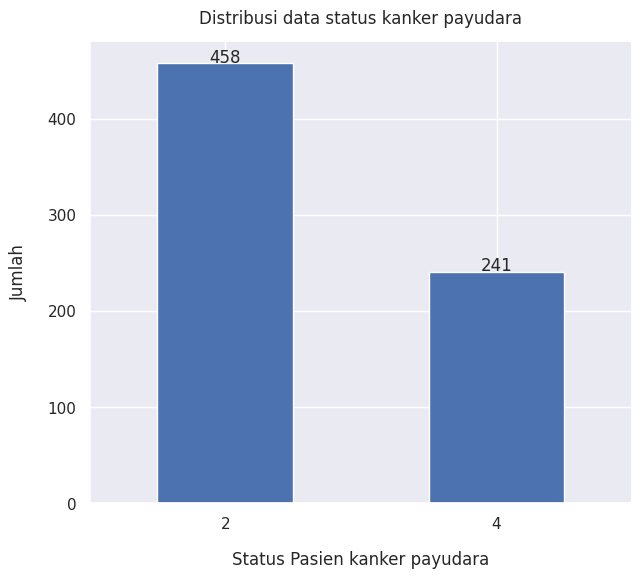

In [48]:
plot_data = dataset['Class'].value_counts()
print(plot_data)

sns.set_theme(font_scale=1.0)
plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data status kanker payudara", y=1.02);

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

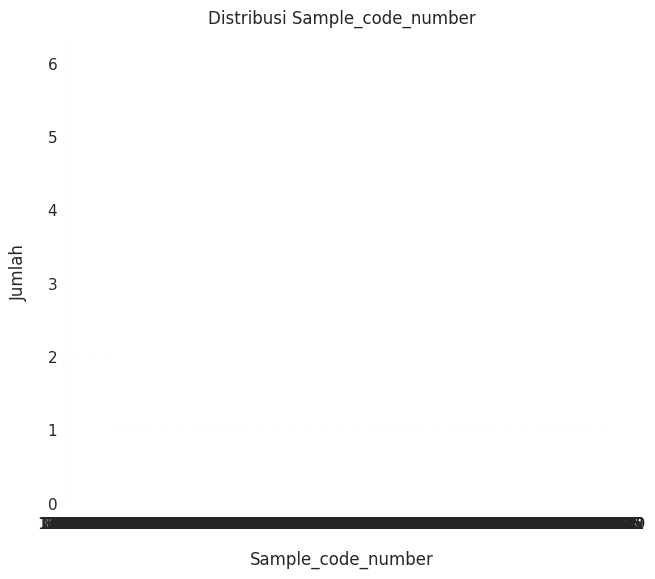

In [49]:
sns.set_theme(font_scale=1.0)
dataset['Sample_code_number'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sample_code_number", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Sample_code_number", y=1.02);

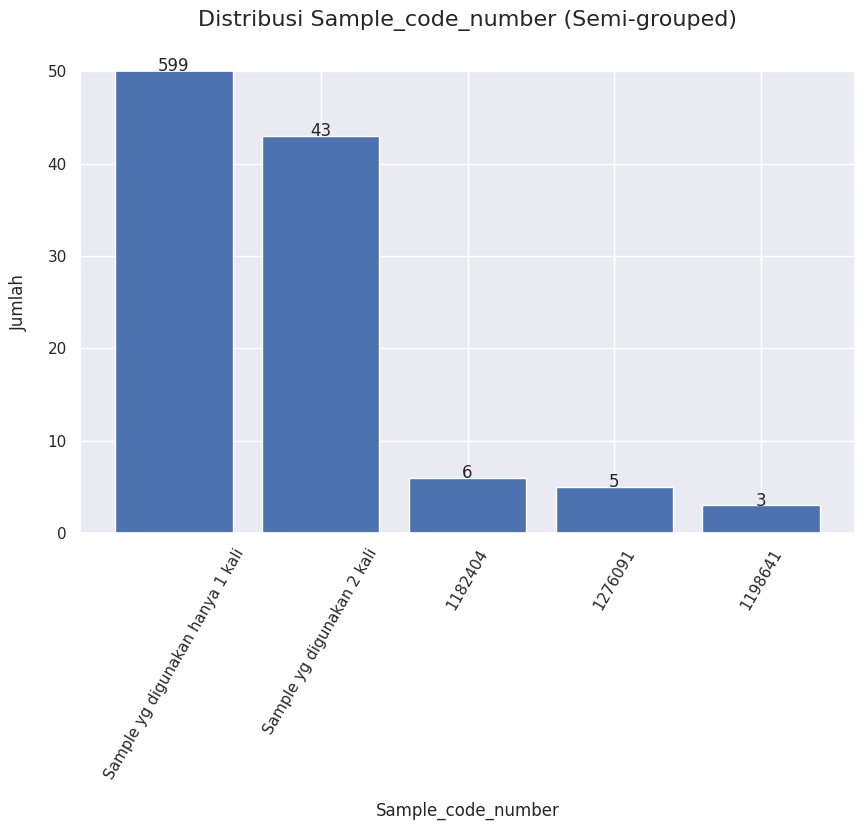

In [50]:
sample_code_number = dataset['Sample_code_number'].value_counts()

scn_dict = {
  'Sample yg digunakan hanya 1 kali': 0,
  'Sample yg digunakan 2 kali': 0,
}

for key, count in sample_code_number.items():
  if count > 2:
    scn_dict[str(key)] = count
  if count == 1:
    scn_dict['Sample yg digunakan hanya 1 kali'] += 1
  if count == 2:
    scn_dict['Sample yg digunakan 2 kali'] += 1

x = list(scn_dict.keys())
y = list(scn_dict.values())

sns.set_theme(font_scale=1.0)
plt.figure(figsize=(10, 6))
plt.bar(x, y)

plt.xlabel("Sample_code_number", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Sample_code_number (Semi-grouped)", fontdict={'size': 16}, y=1.08)

plt.xticks(rotation=60)
plt.ylim(0, 50)

for i in range(len(x)):
  if y[i] < 50:
    plt.text(i, y[i], y[i], ha='center')
  else:
    plt.text(i, 50, y[i], ha='center')

## <b>3) Memvalidasi Data</b> <a class="anchor" id="h3"></a>

Dalam aktivitas ini, Anda harus dapat melakukan pengecekan atas data yang Anda gunakan apakah terdapat missing value, noisy data, atau data yang tidak sesuai lainnya

###Essay 1
Deskripsikan Temuan Anda disini:

*Lihat <b style="color:yellow;">informasi dataset</b> pada file "<span style="color:orange;">breast-cancer-wisconsin.names</span>"

## <b>4) Menentukan Objek Data</b> <a class="anchor" id="h4"></a>

In [51]:
#menghapus fitur yang tidak dapat digunakan
columns_to_drop = ['Sample_code_number']
dataset = dataset.drop(columns_to_drop, axis=1)

dataset.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_of_cell_size      699 non-null    int64 
 2   Uniformity_of_cell_shape     699 non-null    int64 
 3   Marginal_adhesion            699 non-null    int64 
 4   Single_epithelial_cell_size  699 non-null    int64 
 5   Bare_nuclei                  699 non-null    object
 6   Bland_chromatin              699 non-null    int64 
 7   Normal_nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


###Essay 2
Deskripsikan Temuan Anda disini:

## <b>5) Membersihkan Data</b> <a class="anchor" id="h5"></a>

In [53]:
# menghitung nilai Null pada dataset
dataset.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [54]:
# mendeteksi keberadaan nilai Null
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

In [55]:
# Mengubah Type data dari salah satu fitur
dataset['Bare_nuclei'] = dataset['Bare_nuclei'].replace('?', np.nan).astype(float)

In [56]:
# Menampilkan Informasi dari data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [57]:
import missingno

<Axes: >

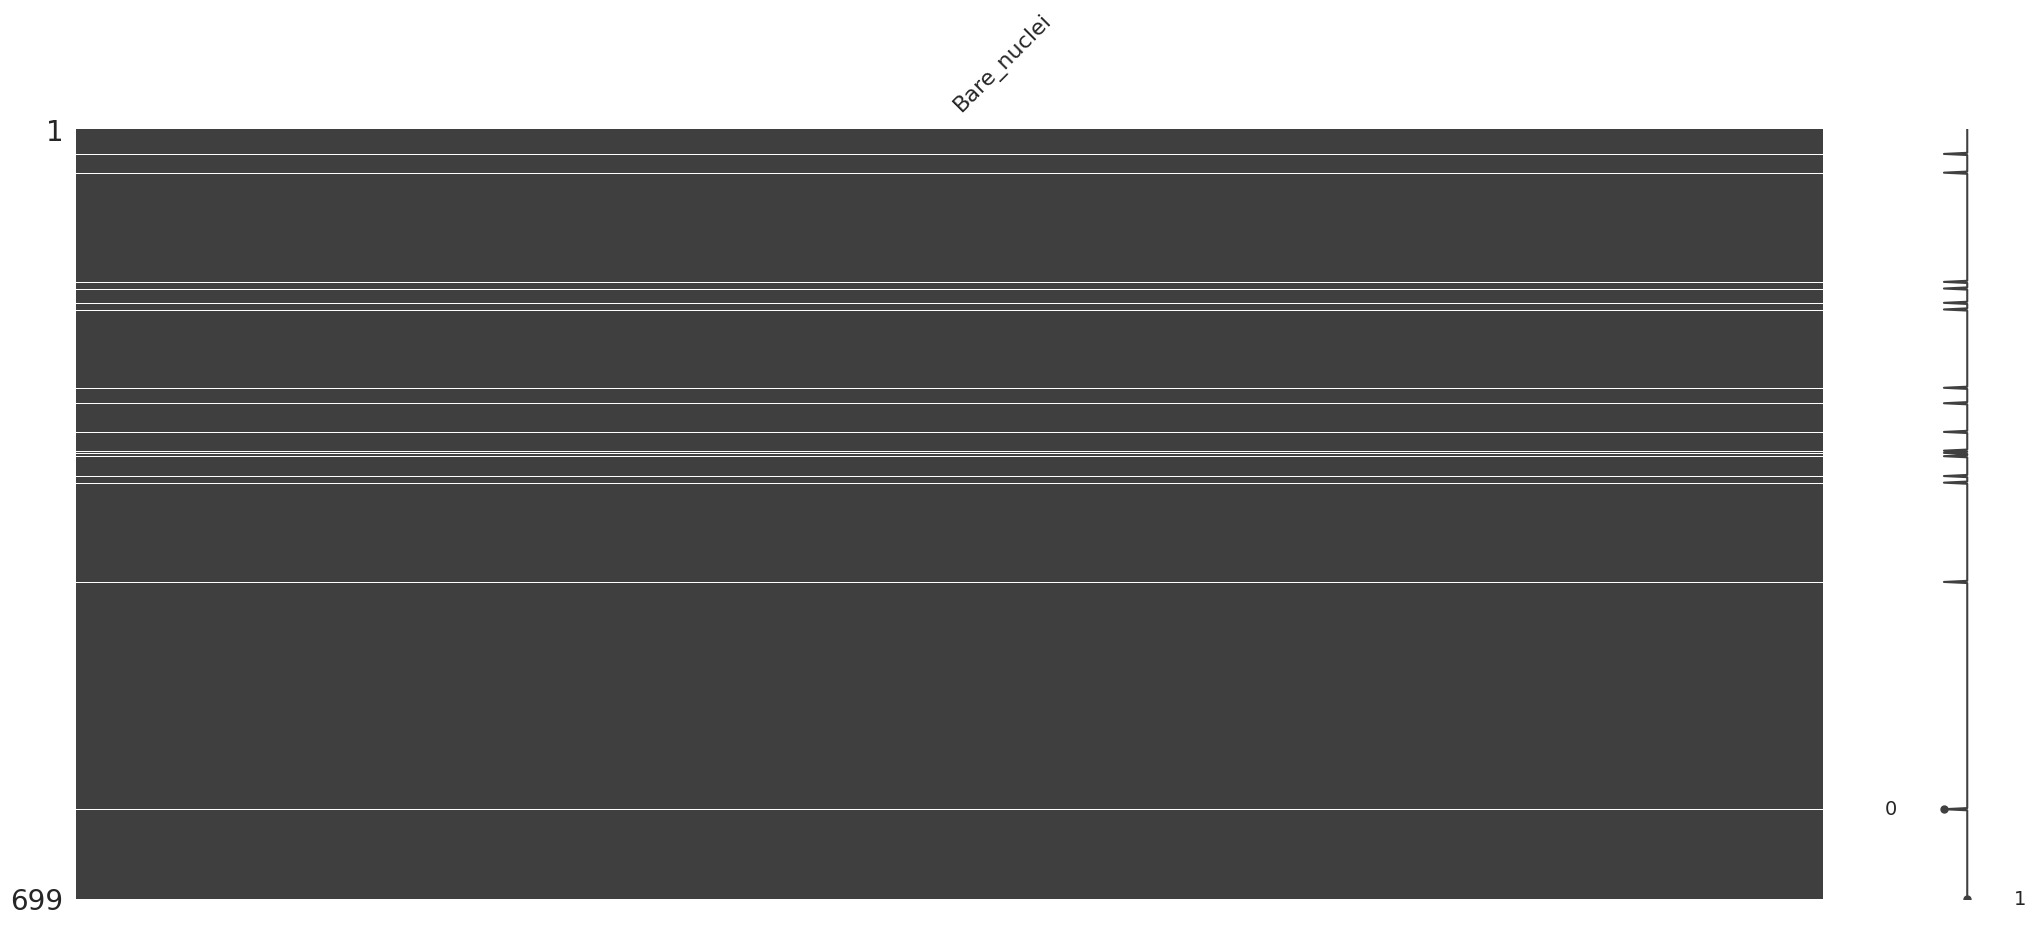

In [58]:
# Memvisualisasikan keberadaan nilai Null
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

<Axes: >

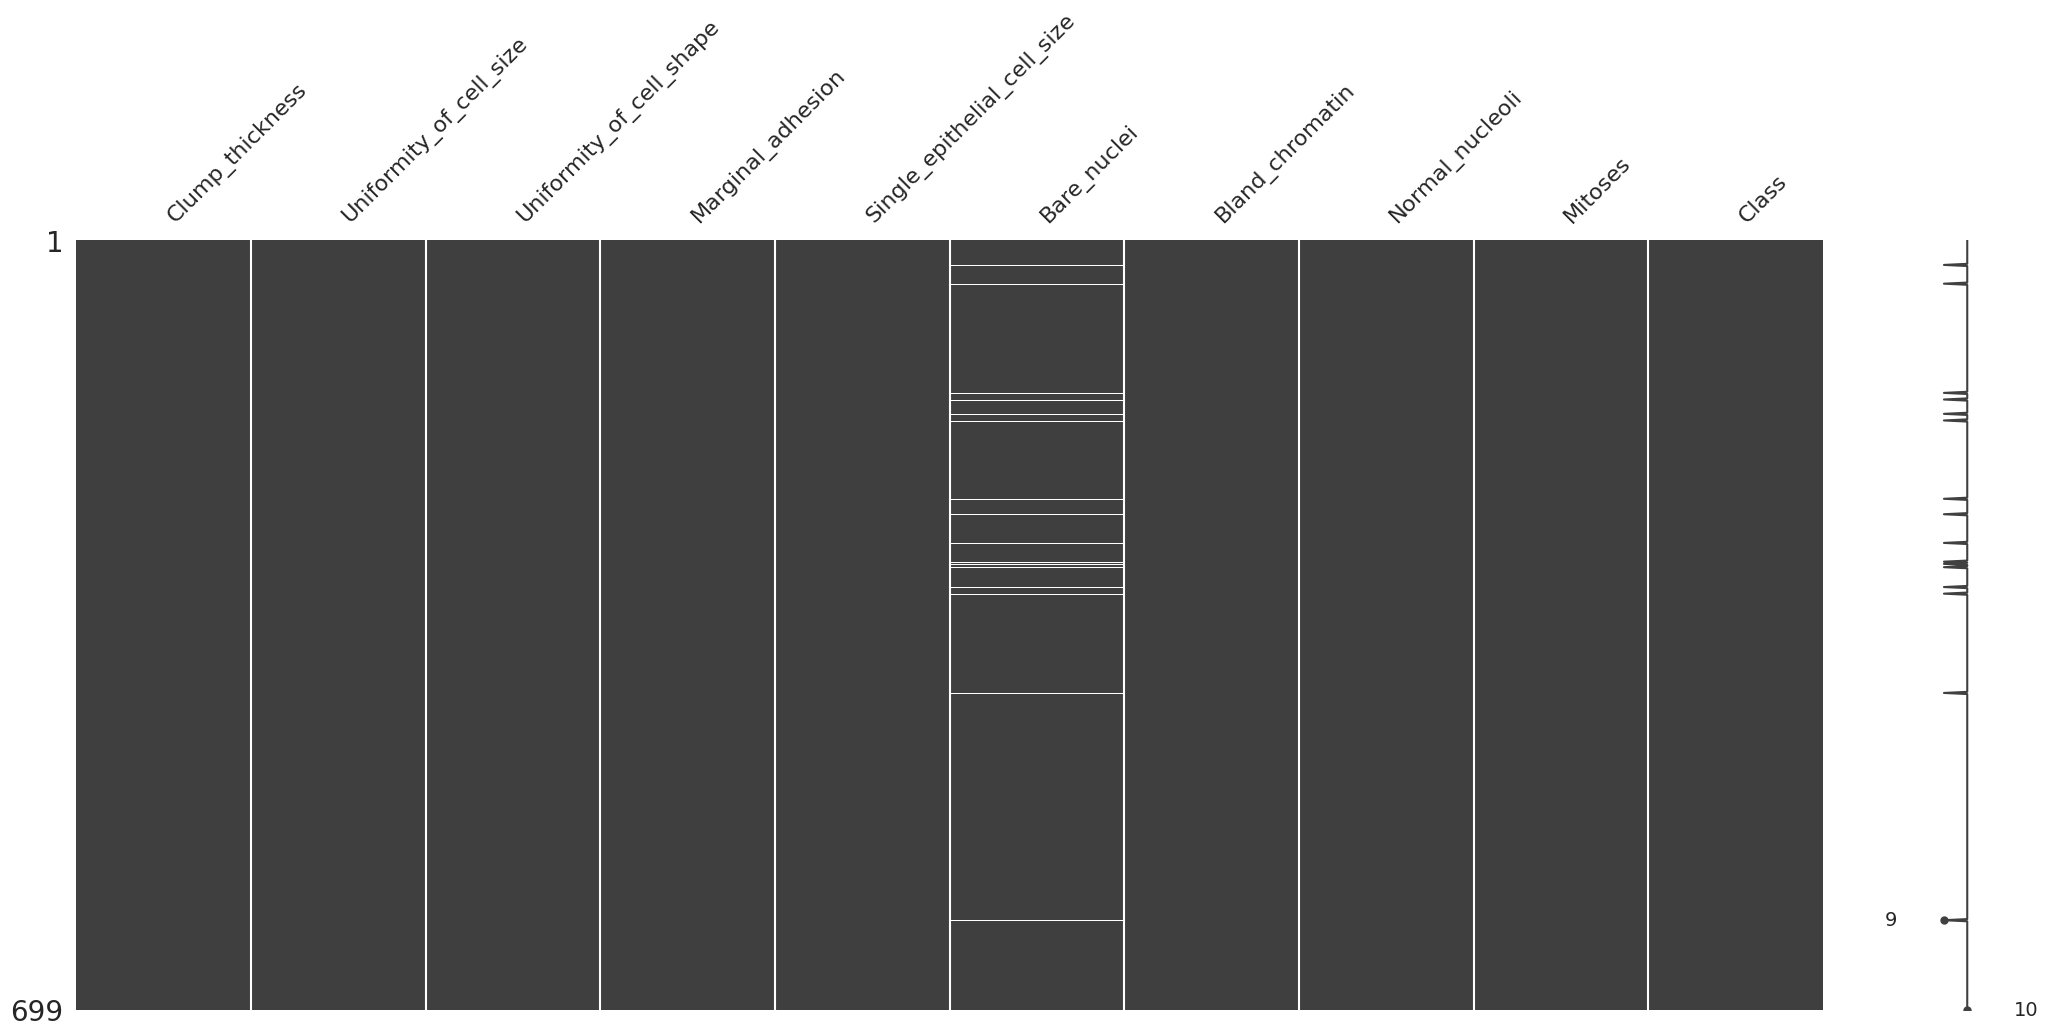

In [59]:
missingno.matrix(dataset)

In [60]:
# diiskan jawaban masing-masing
median_value = dataset['Bare_nuclei'].median()
dataset['Bare_nuclei'] = dataset['Bare_nuclei'].fillna(median_value)

In [61]:
dataset.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [62]:
# Menampilkan data duplikat
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
4,4,1,1,3,2,1.0,3,1,1,2
10,1,1,1,1,1,1.0,3,1,1,2
11,2,1,1,1,2,1.0,2,1,1,2
16,4,1,1,1,2,1.0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1.0,1,1,1,2
688,4,1,1,1,2,1.0,1,1,1,2
690,1,1,1,3,2,1.0,1,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2


In [63]:
# Menghapus data duplikat, menyimpan data dalam variabel dataClean
dataClean = dataset.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [65]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              457 non-null    int64  
 1   Uniformity_of_cell_size      457 non-null    int64  
 2   Uniformity_of_cell_shape     457 non-null    int64  
 3   Marginal_adhesion            457 non-null    int64  
 4   Single_epithelial_cell_size  457 non-null    int64  
 5   Bare_nuclei                  457 non-null    float64
 6   Bland_chromatin              457 non-null    int64  
 7   Normal_nucleoli              457 non-null    int64  
 8   Mitoses                      457 non-null    int64  
 9   Class                        457 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 39.3 KB


Temuan:

## <b>6) Menkonstruksi Data</b> <a class="anchor" id="h2"></a>

Class
4    238
2    219
Name: count, dtype: int64


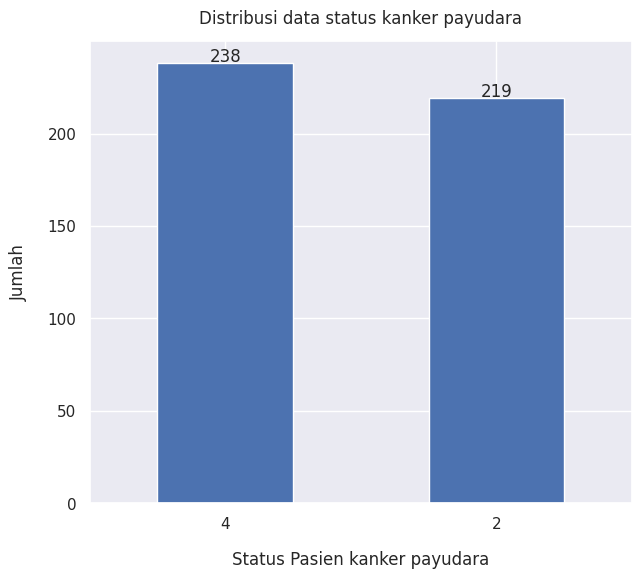

In [66]:
plot_data = dataClean['Class'].value_counts()
print(plot_data)
sns.set_theme(font_scale=1.0)
plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data status kanker payudara", y=1.02);

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

###Essay 3
Deskripsikan Temuan Anda disini

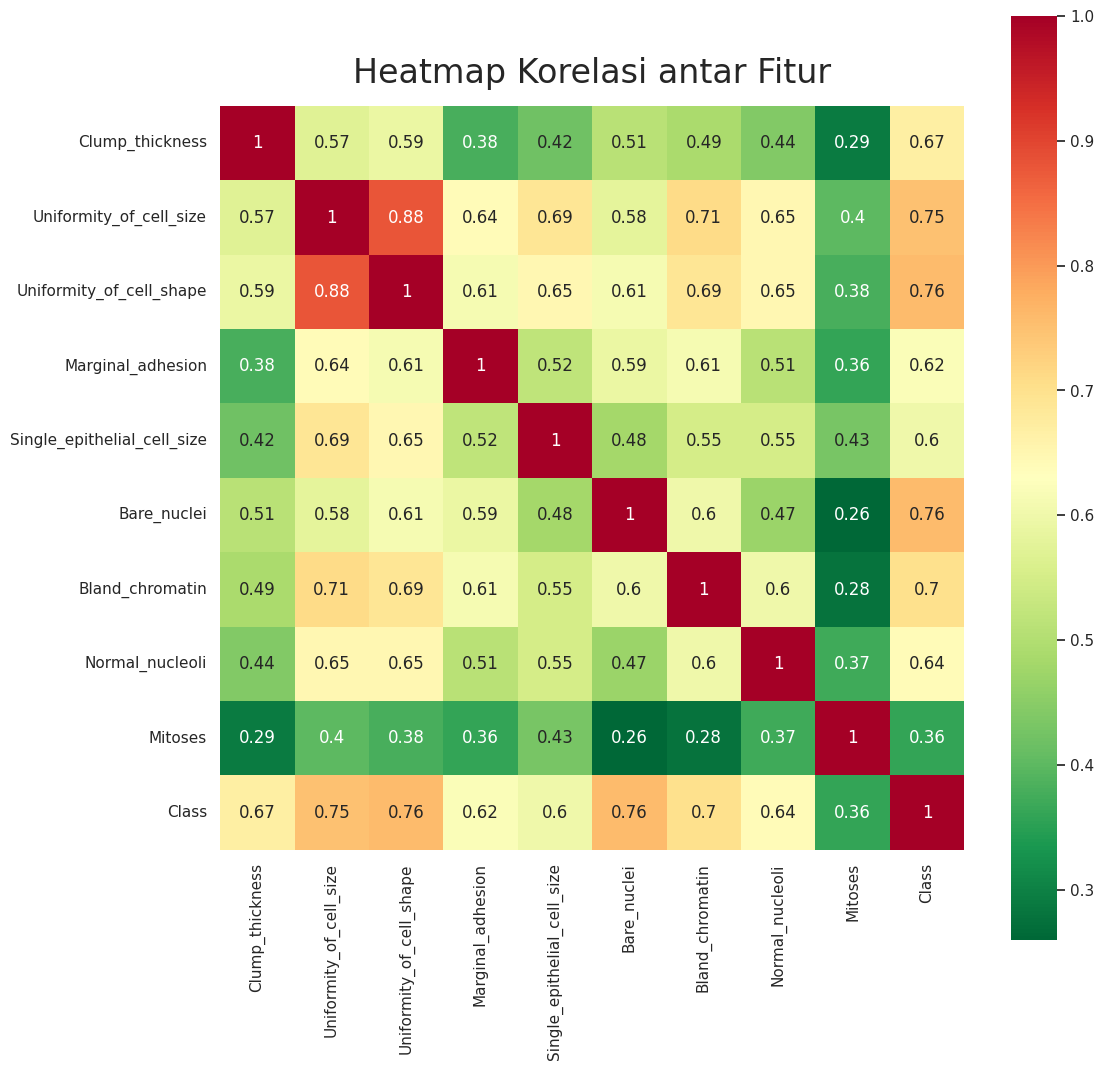

In [67]:
# Menampilkan Korelasi antar Fitur
correlation = dataClean.corr()
plt.figure(figsize=(12, 12))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()

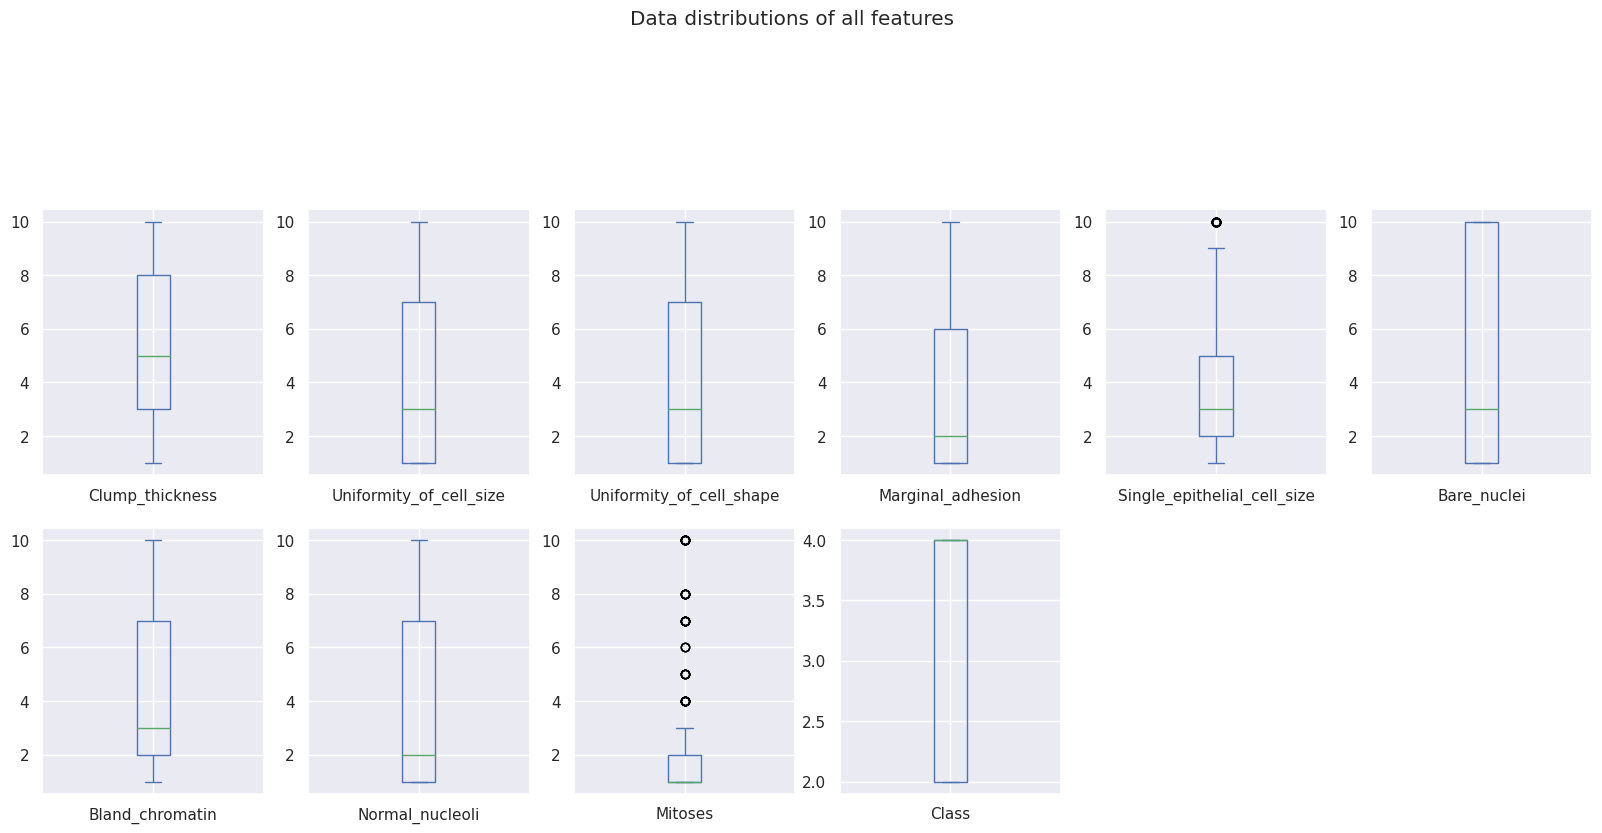

In [68]:
# Menampilkan Boxplot untuk melihat adanya Outlayer
ax = dataClean.plot(
  kind='box',
  subplots=True,
  layout=(5, 6),
  sharex=False,
  figsize=(20, 20),
  title='Data distributions of all features'
)

plt.show()

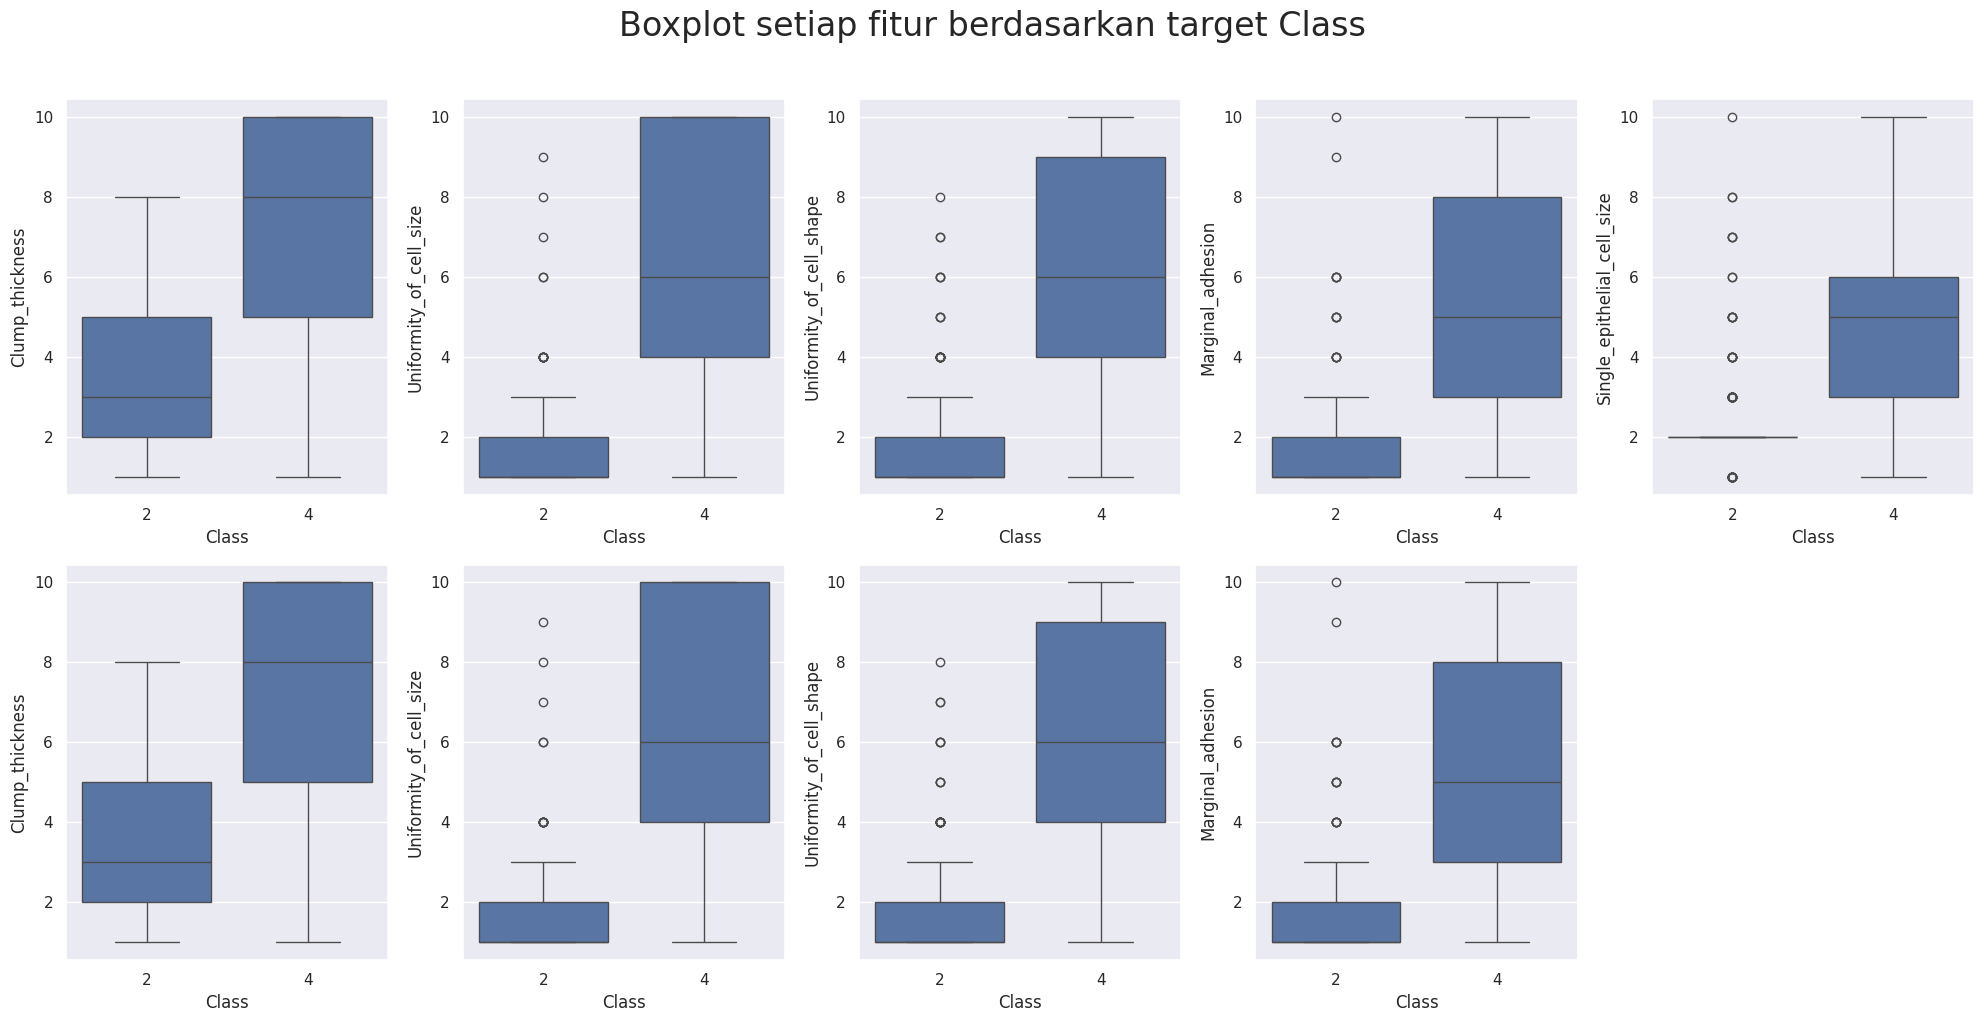

In [69]:
plot_data = dataClean

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
  sns.boxplot(x=plot_data.columns[-1], y=plot_data.columns[i], data=plot_data, ax=axes[0, i])
for i in range(4):
  sns.boxplot(x=plot_data.columns[-1], y=plot_data.columns[i], data=plot_data, ax=axes[1, i])

fig.suptitle("Boxplot setiap fitur berdasarkan target Class", fontsize=24, y=1.02)
fig.delaxes(axes[1, 4]) # remove empty subplot
plt.tight_layout()

plt.show()

In [70]:
#menampilkan deskripsi data yang sudah dibersihkan
dataClean.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,5.367615,4.216630,4.277899,3.726477,3.868709,4.739606,4.196937,3.840263,1.897155,3.041575
std,2.861665,3.240219,3.123098,3.157701,2.449545,3.878645,2.645037,3.392244,2.054182,1.000230
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [71]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              457 non-null    int64  
 1   Uniformity_of_cell_size      457 non-null    int64  
 2   Uniformity_of_cell_shape     457 non-null    int64  
 3   Marginal_adhesion            457 non-null    int64  
 4   Single_epithelial_cell_size  457 non-null    int64  
 5   Bare_nuclei                  457 non-null    float64
 6   Bland_chromatin              457 non-null    int64  
 7   Normal_nucleoli              457 non-null    int64  
 8   Mitoses                      457 non-null    int64  
 9   Class                        457 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 39.3 KB


In [72]:
dataClean

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1.0,2,1,2,2
694,3,1,1,1,3,2.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


## <b>7) Menentukan Label Data</b> <a class="anchor" id="h7"></a>

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = dataClean.drop('Class', axis=1).values
y = dataClean['Class']

In [75]:
# perbandingan data training dan data testing adalah 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## <b>8) Membangun Model</b> <a class="anchor" id="h8"></a>

In [76]:
# import library pemodelan yang digunakan
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
clean_classifier_nb = GaussianNB()
clean_classifier_nb.fit(X_train, y_train)

GaussianNB()

In [78]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## <b>9) Mengevaluasi Hasil Pemodelan</b> <a class="anchor" id="h9"></a>

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

In [81]:
def evaluation(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  rcl = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  ps = precision_score(y_test, y_pred, average='weighted')

  metric_dict = {
    'accuracy': round(acc, 3),
    'recall': round(rcl, 3),
    'F1 score': round(f1, 3),
    'Precision score': round(ps, 3)
  }

  return print(metric_dict)

In [82]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Evaluate the Gaussian NB model
print("\nGaussian NB Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
print("Accuracy:", accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Gaussian NB Model:
Accuracy: 0.957
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.94      0.96        70
           4       0.94      0.97      0.96        68

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



In [83]:
evaluation(y_test, y_pred_nb)

{'accuracy': 0.957, 'recall': 0.957, 'F1 score': 0.957, 'Precision score': 0.957}


In [84]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model:
Accuracy: 0.913
Classification Report:
              precision    recall  f1-score   support

           2       0.89      0.94      0.92        70
           4       0.94      0.88      0.91        68

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138



In [85]:
evaluation(y_test, y_pred_dt)

{'accuracy': 0.913, 'recall': 0.913, 'F1 score': 0.913, 'Precision score': 0.914}


In [86]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.96      0.95        70
           4       0.96      0.94      0.95        68

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138



In [87]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.949}


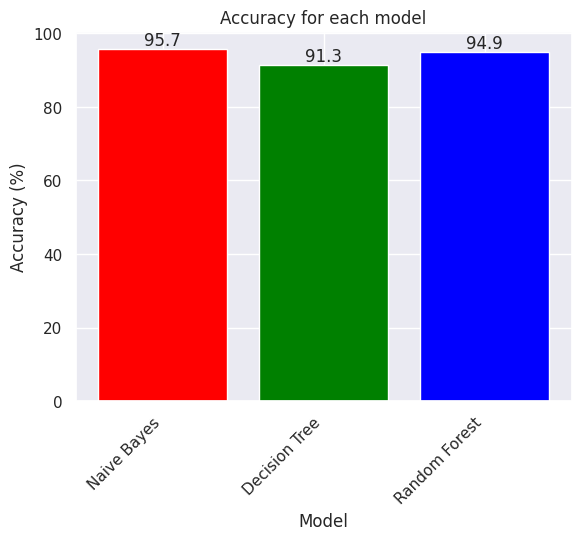

In [88]:
model_comp = pd.DataFrame({
  'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
  'Accuracy': [accuracy_nb*100, accuracy_dt*100, accuracy_rf*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for each model')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## <b>10) Optimasi Model Klasifikasi</b> <a class="anchor" id="h10"></a>

Class
4    238
2    219
Name: count, dtype: int64


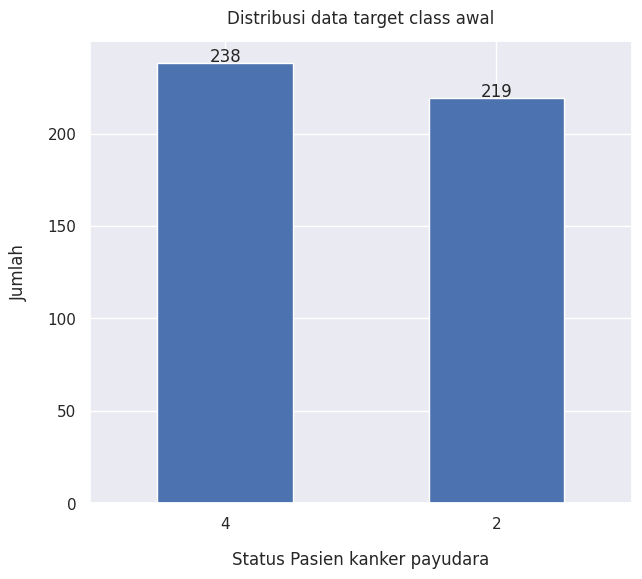

In [89]:
# Menampilkan distribusi target class awal

plot_data = dataClean['Class'].value_counts()
print(plot_data)
sns.set_theme(font_scale=1.0)
plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data target class awal", y=1.02);

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

In [90]:
from imblearn.over_sampling import SMOTE

X = dataClean.drop(columns=['Class'])
y = dataClean['Class']

smote = SMOTE(random_state=42)

# Resampling data menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

dataResampled = X_resampled
dataResampled['Class'] = y_resampled

print("Jumlah baris data setelah resampling: {}".format(dataResampled.shape[0]))

Jumlah baris data setelah resampling: 476


Class
2    238
4    238
Name: count, dtype: int64


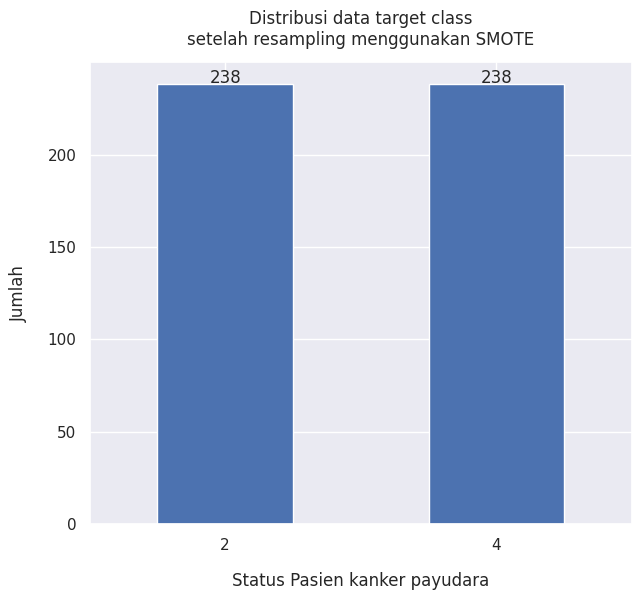

In [91]:
plot_data = dataResampled['Class'].value_counts()
print(plot_data)
sns.set_theme(font_scale=1.0)
plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data target class\nsetelah resampling menggunakan SMOTE", y=1.02);

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

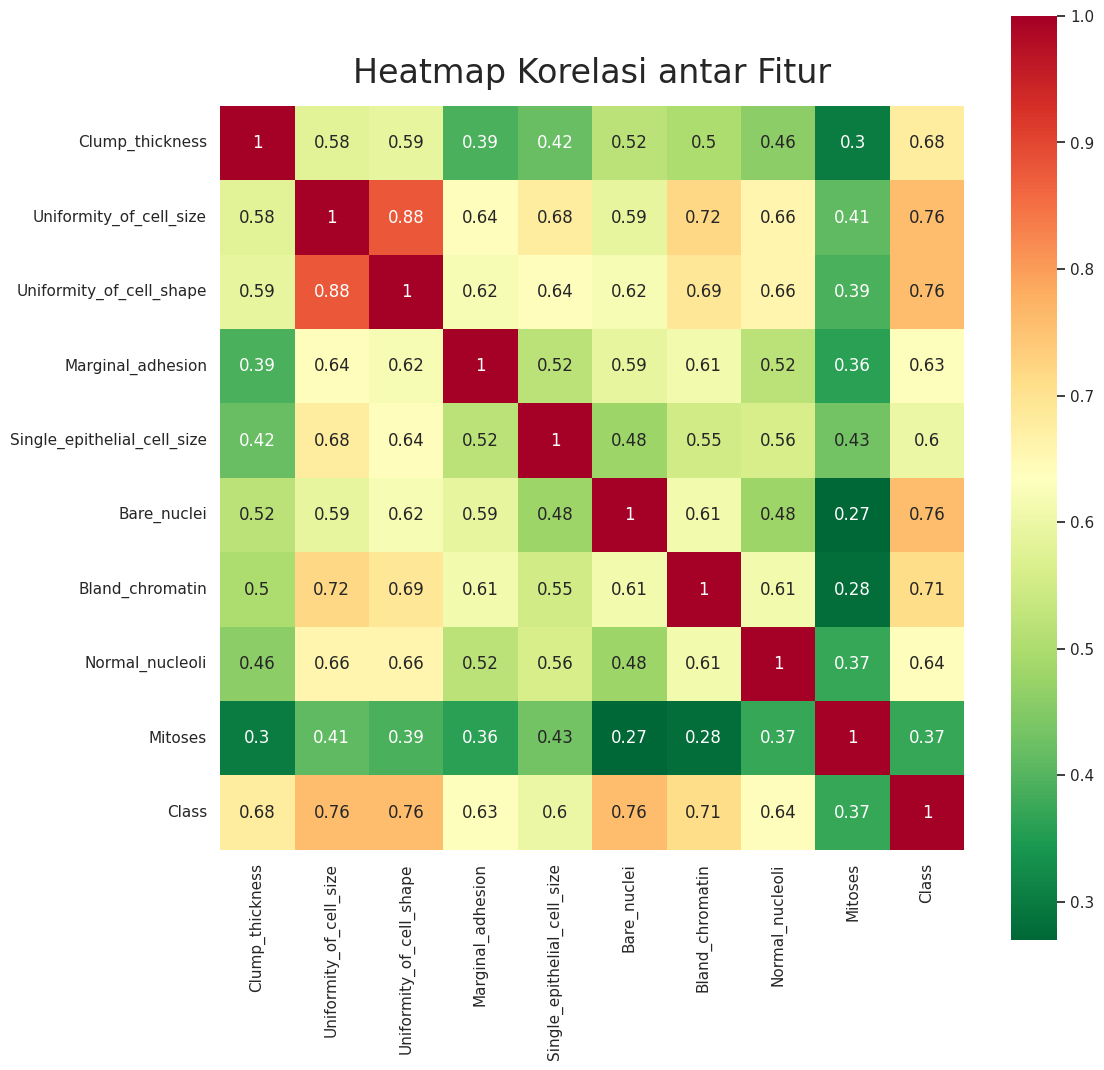

In [92]:
# Menampilkan Korelasi antar Fitur
correlation = dataResampled.corr()
plt.figure(figsize=(12, 12))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()

In [93]:
columns_to_drop = [
  'Mitoses',
  'Class'
]

X_selected = dataResampled.drop(columns_to_drop, axis=1).values
y = dataResampled['Class']

In [94]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [95]:
optimized_classifier_nb = GaussianNB()
optimized_classifier_nb.fit(X_train_selected, y_train_selected)

GaussianNB()

In [96]:
optimized_classifier_dt = DecisionTreeClassifier(random_state=42)
optimized_classifier_dt.fit(X_train_selected, y_train_selected)

DecisionTreeClassifier(random_state=42)

In [97]:
optimized_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
optimized_classifier_rf.fit(X_train_selected, y_train_selected)

RandomForestClassifier(random_state=42)

In [98]:
y_pred_nb_optimized = optimized_classifier_nb.predict(X_test_selected)

# Evaluate the Optimized Gaussian NB model
print("\nOptimized Gaussian NB Model:")
accuracy_nb_optimized = round(accuracy_score(y_test_selected, y_pred_nb_optimized), 3)
print("Accuracy:", accuracy_nb_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_nb_optimized))


Optimized Gaussian NB Model:
Accuracy: 0.965
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        66
           4       0.96      0.97      0.97        77

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



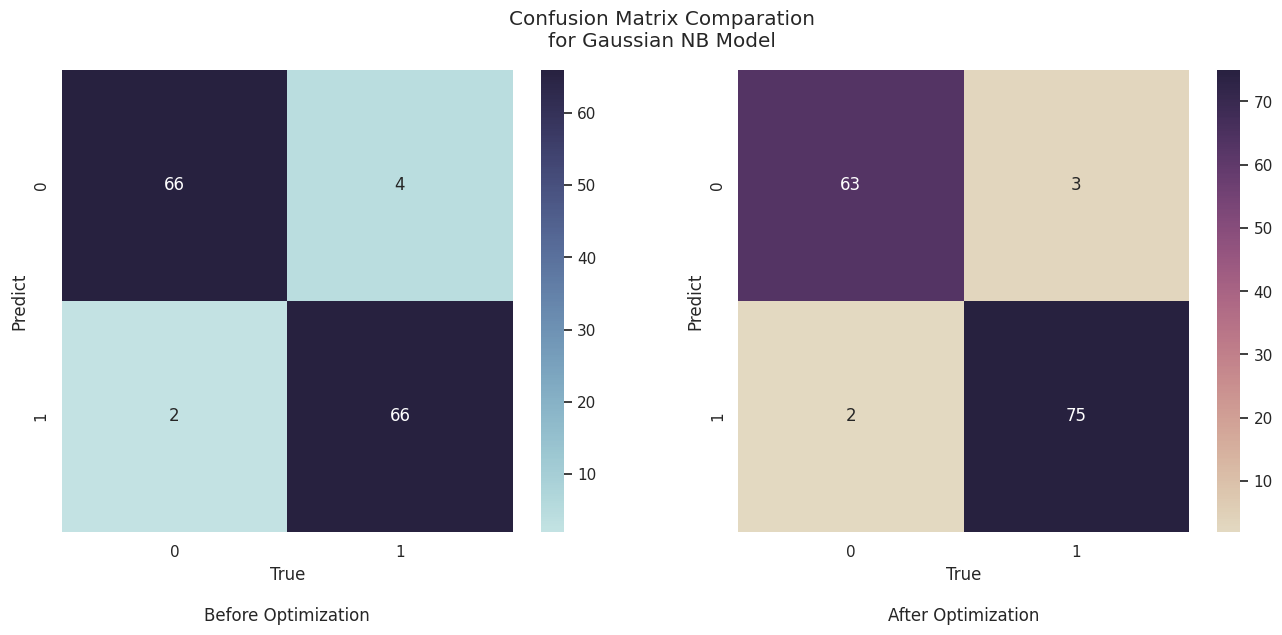

In [99]:
cm = confusion_matrix(y_test, y_pred_nb)
cm_optimized = confusion_matrix(y_test_selected, y_pred_nb_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Gaussian NB Model")

plt.show()

In [100]:
y_pred_dt_optimized = optimized_classifier_dt.predict(X_test_selected)

# Evaluate the Optimized Decision Tree model
print("\nOptimized Decision Tree Model:")
accuracy_dt_optimized = round(accuracy_score(y_test_selected, y_pred_dt_optimized), 3)
print("Accuracy:", accuracy_dt_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_dt_optimized))


Optimized Decision Tree Model:
Accuracy: 0.902
Classification Report:
              precision    recall  f1-score   support

           2       0.85      0.95      0.90        66
           4       0.96      0.86      0.90        77

    accuracy                           0.90       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



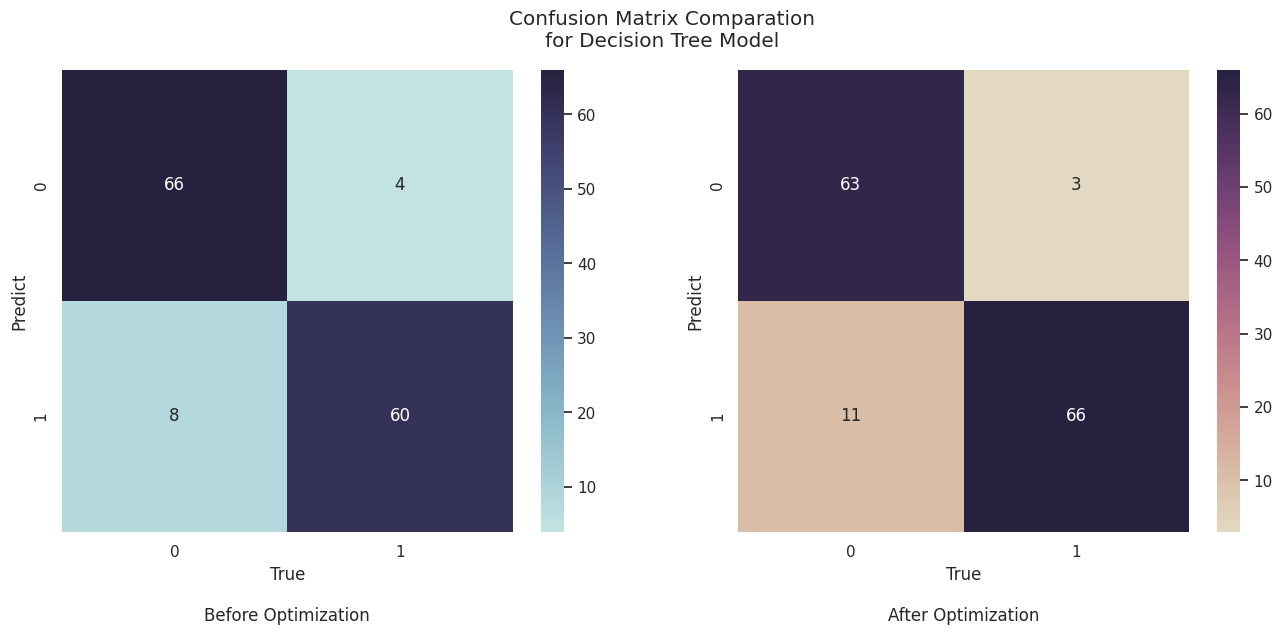

In [101]:
cm = confusion_matrix(y_test, y_pred_dt)
cm_optimized = confusion_matrix(y_test_selected, y_pred_dt_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Decision Tree Model")

plt.show()

In [102]:
y_pred_rf_optimized = optimized_classifier_rf.predict(X_test_selected)

# Evaluate the Optimized Random Forest model
print("\nOptimized Random Forest Model:")
accuracy_rf_optimized = round(accuracy_score(y_test_selected, y_pred_rf_optimized), 3)
print("Accuracy:", accuracy_rf_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_rf_optimized))


Optimized Random Forest Model:
Accuracy: 0.958
Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.97      0.96        66
           4       0.97      0.95      0.96        77

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



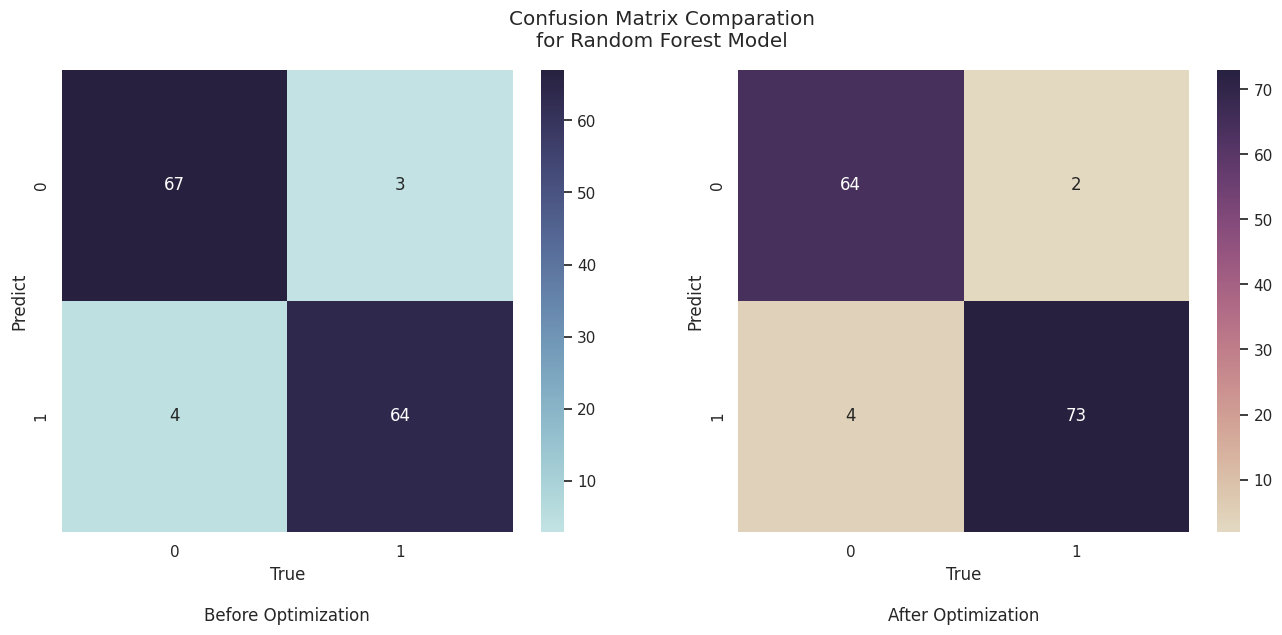

In [103]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_optimized = confusion_matrix(y_test_selected, y_pred_rf_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Random Forest Model")

plt.show()

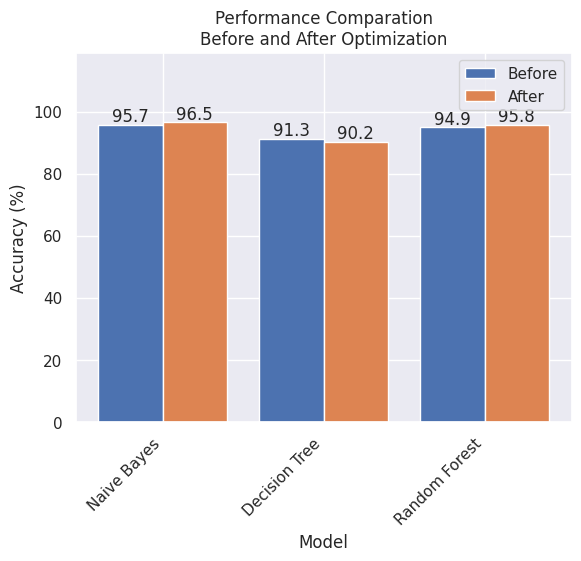

In [104]:
import numpy as np

model_name = ['Naive Bayes', 'Decision Tree', 'Random Forest']
before_optimization = [accuracy_nb*100, accuracy_dt*100, accuracy_rf*100]
after_optimization = [accuracy_nb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100]

X_axis = np.arange(len(model_name))

bars_1 = plt.bar(X_axis - 0.2, before_optimization, 0.4, label='Before')
bars_2 = plt.bar(X_axis + 0.2, after_optimization, 0.4, label='After')

for i, counts in enumerate(before_optimization):
  plt.text(i - 0.2, (counts + 1), str(round(counts, 1)), ha='center')

for i, counts in enumerate(after_optimization):
  plt.text(i + 0.2, (counts + 1), str(round(counts, 1)), ha='center')

plt.xticks(X_axis, model_name, rotation=45, ha='right')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Performance Comparation\nBefore and After Optimization')

plt.ylim(None, 119)
plt.legend()

plt.show()